<a href="https://colab.research.google.com/github/Ahmed-Magdi1/Lab2_Machine_Vision/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB_2_Question_2**

### **1) Take a picture of your face and save it as (yourname0.jpg) =𝑓(𝑢,𝑣)**

In [142]:
# Important libraries
import  cv2 as cv  #Define computer vision library
import numpy as np #Define numpy library
from matplotlib import pyplot as plt #Define matplotlib library

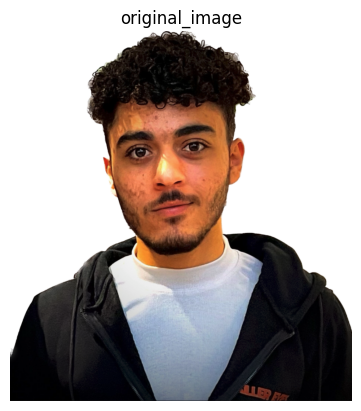

In [137]:
image = cv.imread('/content/ahmed.png') #Read the image
original_image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #Convert the image from BGR to RGB
plt.imshow(original_image) #Show the image
plt.axis('off')  # Disable the axises
plt.title('original_image')  # Set the title
plt.show()  # Show the plot
cv.imwrite('ahmed0.jpg', image) # Save the image with name 'ahmed0.jpg'
image_gray = cv.cvtColor(original_image, cv.COLOR_RGB2GRAY)


### **2) Create a set of noisy images by corrupting an image with**

### (a) Additive Gaussian noise of five different severity levels

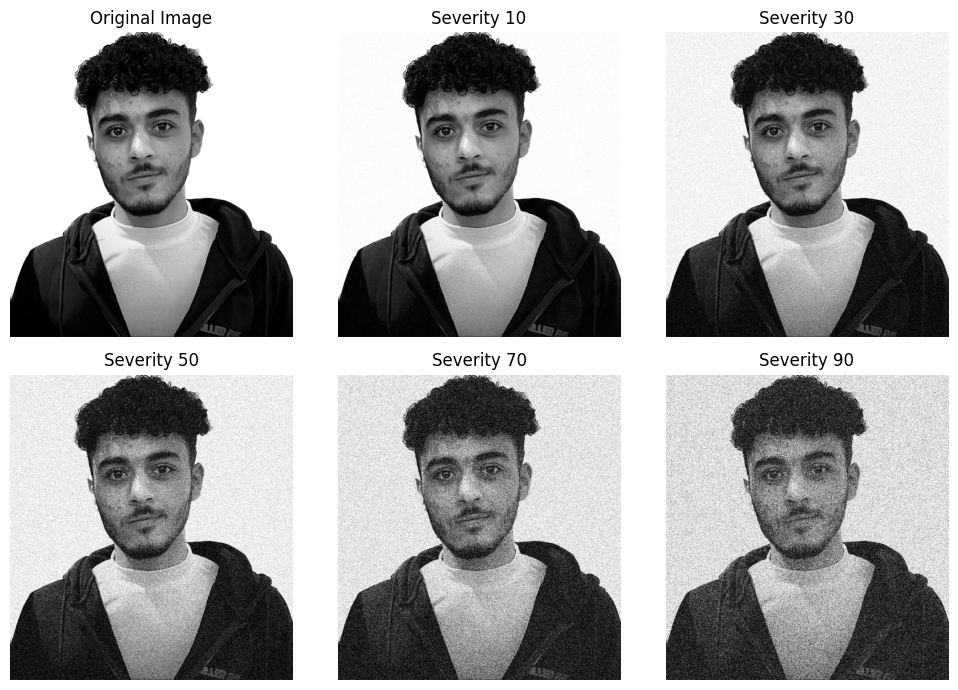

In [153]:
# Define severity levels (standard deviations)
severity_levels = [10, 30, 50, 70, 90]

# Variables to store noisy images for severity levels 10, 30, and 50
noisy_image_10 = None
noisy_image_30 = None
noisy_image_50 = None

# Create a 2x3 grid for the images
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# Display the original image in the top-left corner
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Generate and display each noisy image in the grid
for i, severity in enumerate(severity_levels):
    row = (i + 1) // 3  # Calculate the row
    col = (i + 1) % 3   # Calculate the column

    # Generate Gaussian noise with the specified severity
    noise = np.random.normal(0, severity, image_gray.shape).astype(np.int16)

    # Add noise to the grayscale image
    noisy_image = image_gray.astype(np.int16) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    # Store the noisy image for specific severity levels
    if severity == 10:
        noisy_image_10 = noisy_image
    elif severity == 30:
        noisy_image_30 = noisy_image
    elif severity == 50:
        noisy_image_50 = noisy_image

    # Display the noisy image in the calculated position
    axes[row, col].imshow(noisy_image, cmap='gray')
    axes[row, col].set_title(f'Severity {severity}')
    axes[row, col].axis('off')

# Adjust layout for better spacing and show the plot
plt.tight_layout()
plt.show()


### (b) Multiplicative Gaussian noise of five different severity levels

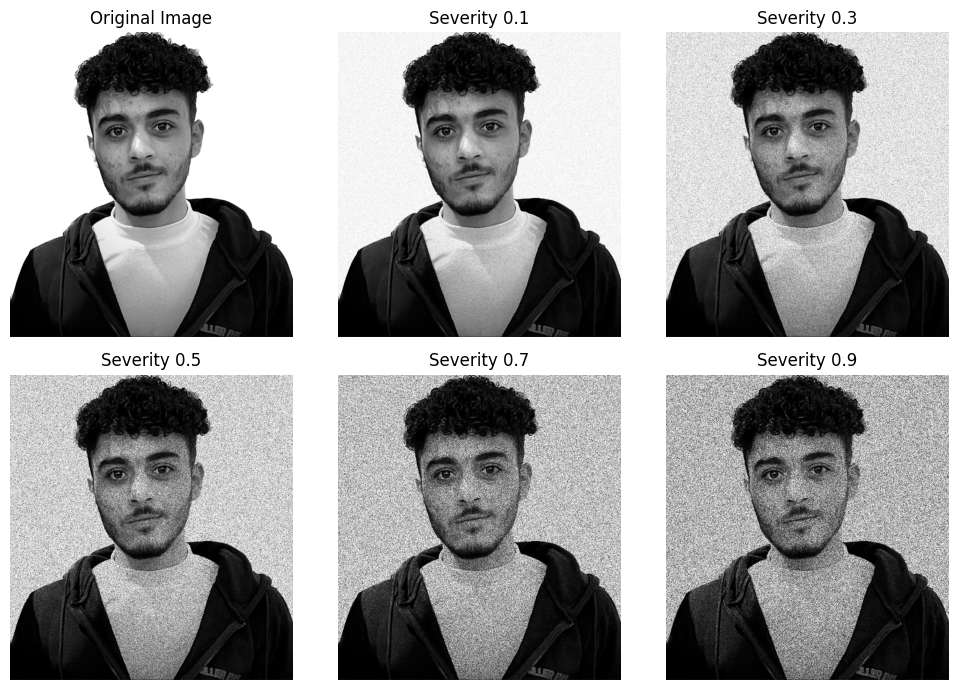

In [234]:
# Define severity levels for Multiplicative Gaussian noise
severity_levels = [0.1, 0.3, 0.5, 0.7, 0.9]

# Variables to store noisy images for specific severity levels
noisy_image_0_1 = None
noisy_image_0_5 = None
noisy_image_0_9 = None

# Create a 2x3 grid for the images
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# Display the original image in the top-left corner
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Generate and display each noisy image in the grid
for i, severity in enumerate(severity_levels):
    row = (i + 1) // 3  # Calculate the row (0 for first row, 1 for second)
    col = (i + 1) % 3   # Calculate the column within the row

    # Generate Multiplicative Gaussian noise with the specified severity
    noise = np.random.normal(1, severity, image_gray.shape).astype(np.float32)

    # Apply multiplicative noise to the grayscale image
    noisy_image = image_gray.astype(np.float32) * noise

    # Clip to ensure pixel values are within the 0-255 range
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    # Store the noisy image for specific severity levels
    if severity == 0.1:
        noisy_image_0_1 = noisy_image
    elif severity == 0.5:
        noisy_image_0_5 = noisy_image
    elif severity == 0.9:
        noisy_image_0_9 = noisy_image

    # Display the noisy image in the calculated position
    axes[row, col].imshow(noisy_image, cmap='gray')
    axes[row, col].set_title(f'Severity {severity}')
    axes[row, col].axis('off')

# Adjust layout for better spacing and show the plot
plt.tight_layout()
plt.show()


### (c) Impulse noise of five different severity levels

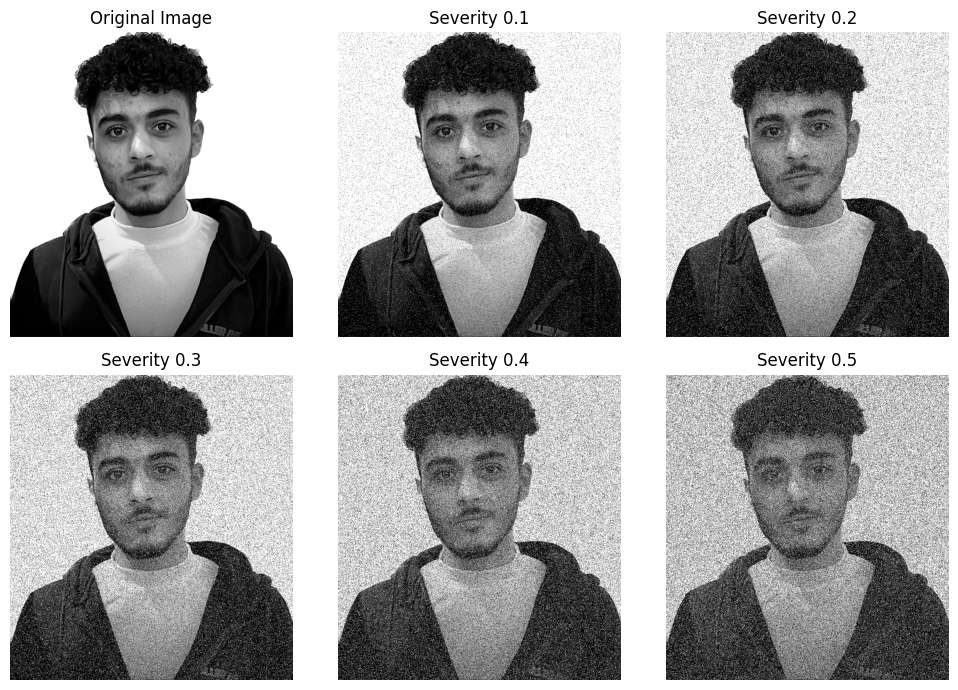

In [259]:
# Define severity levels for impulse noise (probabilities)
severity_levels = [0.1, 0.2, 0.3, 0.4, 0.5]

# Variables to store noisy images for specific severity levels
noisy_image_0_2 = None
noisy_image_0_3 = None
noisy_image_0_4 = None

# Create a 2x3 grid for the images
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# Display the original image in the top-left corner
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Define positions in the grid for each noisy image
positions = [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

# Apply impulse noise for each severity level
for severity, pos in zip(severity_levels, positions):
    # Copy the original image
    noisy_image = image_gray.copy()

    # Calculate the number of salt and pepper pixels
    num_pixels = int(severity * image_gray.size / 2)

    # Apply salt noise (white pixels)
    salt_coords = np.random.choice(image_gray.size, num_pixels, replace=False)
    noisy_image[np.unravel_index(salt_coords, image_gray.shape)] = 255

    # Apply pepper noise (black pixels)
    pepper_coords = np.random.choice(image_gray.size, num_pixels, replace=False)
    noisy_image[np.unravel_index(pepper_coords, image_gray.shape)] = 0

    # Store the noisy image for specific severity levels
    if severity == 0.2:
        noisy_image_0_2 = noisy_image
    elif severity == 0.3:
        noisy_image_0_3 = noisy_image
    elif severity == 0.4:
        noisy_image_0_4 = noisy_image

    # Display the noisy image
    axes[pos].imshow(noisy_image, cmap='gray')
    axes[pos].set_title(f'Severity {severity}')
    axes[pos].axis('off')

# Adjust layout for better spacing and show the plot
plt.tight_layout()
plt.show()


# **Apply the following filters to remove the superimposed noise as much as possible**

*   Averaging filters of different sizes
*   Gaussian filters of different standard deviations
*   Median filters of different sizes and/or numbers of iterations
*   Averaging with limited data validity
*   Rotating mask averaging





In [145]:
######## Important functions ########

####################### Averaging filter #######################
def apply_averaging_filter(image, kernel_size):
    return cv.blur(image, (kernel_size, kernel_size))

######################## Gaussian filter ########################
def apply_gaussian_filter(image, kernel_size, sigma):
    return cv.GaussianBlur(image, (kernel_size, kernel_size), sigma)

######################### Median filter #########################
def apply_median_filter(image, kernel_size, iterations=1):
    filtered_image = image.copy()
    for _ in range(iterations):
        filtered_image = cv.medianBlur(filtered_image, kernel_size)
    return filtered_image

############## Averaging with limited data validity ##############
def apply_masked_averaging_filter(image, mask):
    masked_image = cv.bitwise_and(image, image, mask=mask)
    return cv.blur(masked_image, (3, 3))  # Use a small kernel for masked averaging

##################### Rotating Mask Averaging #####################
def apply_rotating_mask_averaging(image):
    filtered1 = cv.blur(image, (3, 1))  # Horizontal averaging
    filtered2 = cv.blur(image, (1, 3))  # Vertical averaging
    return cv.addWeighted(filtered1, 0.5, filtered2, 0.5, 0)

##################### Mean Square Error function #####################
def calculate_mse(original, filtered):
    return np.mean((original - filtered) ** 2)




###**For Additive Gaussian noise of five different severity levels**

*   10 severity
*   30 severity
*   50 severity



* 10 severity

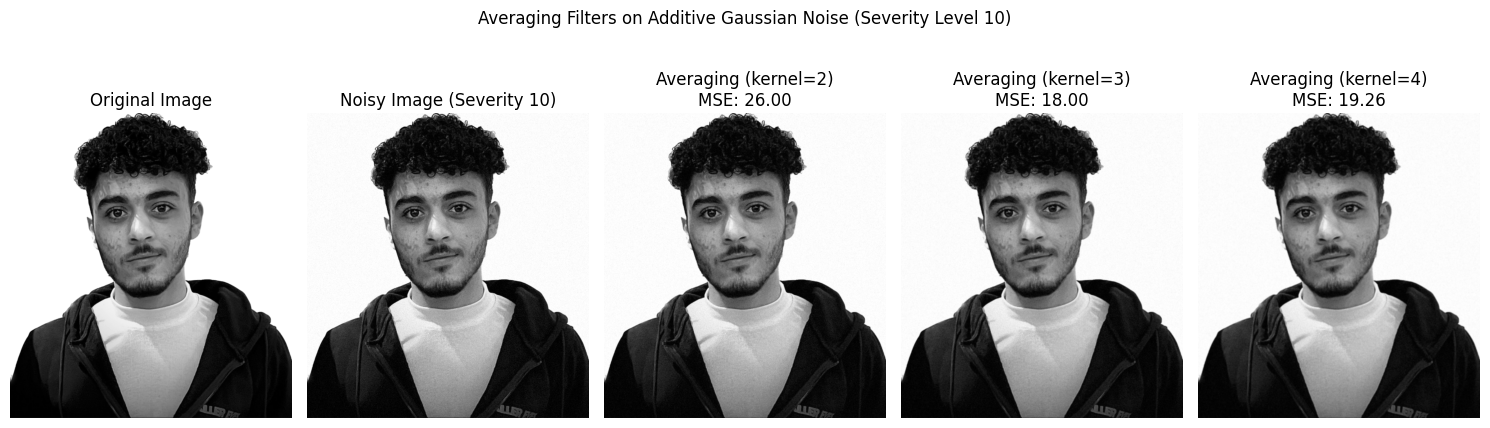

In [206]:
# Define different kernel sizes for the Averaging Filter
kernel_sizes = [2, 3, 4]

# Store results for visualization
results = []

# Apply filters to the noisy image with severity level 10
for kernel in kernel_sizes:
    # Apply Averaging Filter with the current kernel size
    filtered_image = apply_averaging_filter(noisy_image_10, kernel)

    # Calculate MSE between the original (noise-free) and the filtered image
    mse = calculate_mse(image_gray, filtered_image)

    # Store the result (title, image, mse) for display
    results.append((f"Averaging (kernel={kernel})", filtered_image, mse))

# Display original, noisy, and filtered images for the noisy image with severity level 10
fig, axes = plt.subplots(1, len(results) + 2, figsize=(15, 5))
fig.suptitle("Averaging Filters on Additive Gaussian Noise (Severity Level 10)")

# Show original image
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show noisy image
axes[1].imshow(noisy_image_10, cmap='gray')
axes[1].set_title("Noisy Image (Severity 10)")
axes[1].axis('off')

# Show each filtered image and MSE
for ax, (title, img, mse) in zip(axes[2:], results):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{title}\nMSE: {mse:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()


* 30 severity

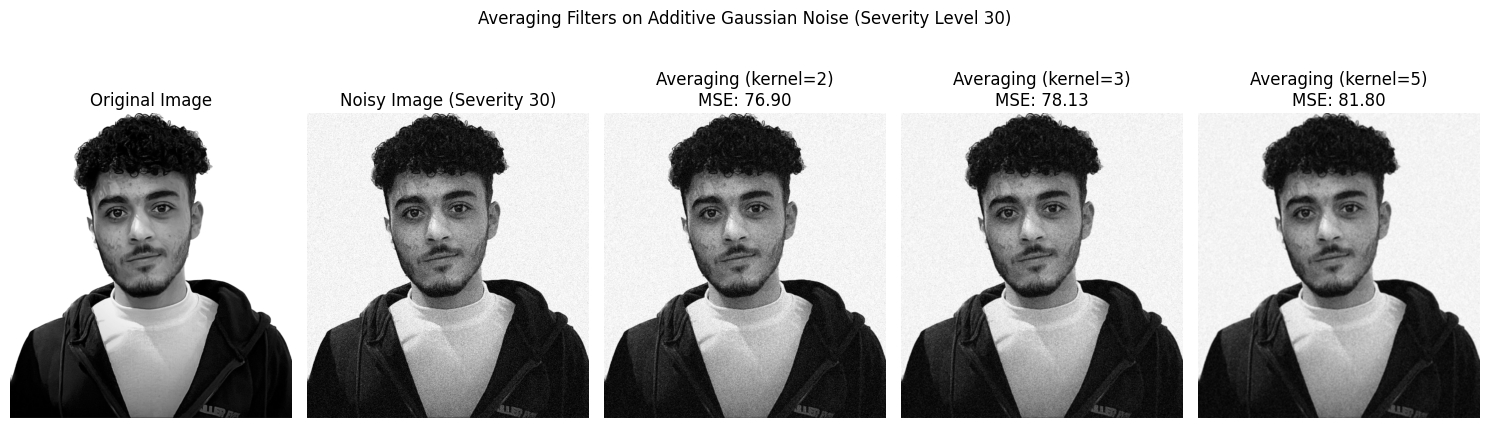

In [224]:
# Define different kernel sizes for the Averaging Filter
kernel_sizes = [2, 3, 5]

# Store results for visualization
results = []

# Apply filters to the noisy image with severity level 10
for kernel in kernel_sizes:
    # Apply Averaging Filter with the current kernel size
    filtered_image = apply_averaging_filter(noisy_image_30, kernel)

    # Calculate MSE between the original (noise-free) and the filtered image
    mse = calculate_mse(image_gray, filtered_image)

    # Store the result (title, image, mse) for display
    results.append((f"Averaging (kernel={kernel})", filtered_image, mse))

# Display original, noisy, and filtered images for the noisy image with severity level 10
fig, axes = plt.subplots(1, len(results) + 2, figsize=(15, 5))
fig.suptitle("Averaging Filters on Additive Gaussian Noise (Severity Level 30)")

# Show original image
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show noisy image
axes[1].imshow(noisy_image_30, cmap='gray')
axes[1].set_title("Noisy Image (Severity 30)")
axes[1].axis('off')

# Show each filtered image and MSE
for ax, (title, img, mse) in zip(axes[2:], results):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{title}\nMSE: {mse:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()


* 50 severity

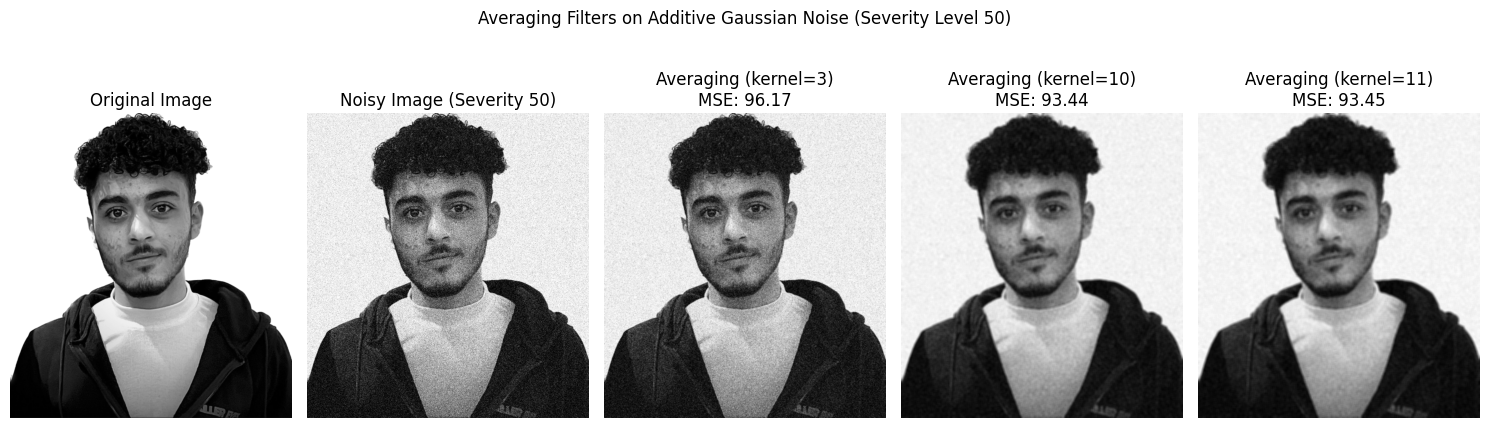

In [233]:
# Define different kernel sizes for the Averaging Filter
kernel_sizes = [3, 10, 11]

# Store results for visualization
results = []

# Apply filters to the noisy image with severity level 10
for kernel in kernel_sizes:
    # Apply Averaging Filter with the current kernel size
    filtered_image = apply_averaging_filter(noisy_image_50, kernel)

    # Calculate MSE between the original (noise-free) and the filtered image
    mse = calculate_mse(image_gray, filtered_image)

    # Store the result (title, image, mse) for display
    results.append((f"Averaging (kernel={kernel})", filtered_image, mse))

# Display original, noisy, and filtered images for the noisy image with severity level 10
fig, axes = plt.subplots(1, len(results) + 2, figsize=(15, 5))
fig.suptitle("Averaging Filters on Additive Gaussian Noise (Severity Level 50)")

# Show original image
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show noisy image
axes[1].imshow(noisy_image_50, cmap='gray')
axes[1].set_title("Noisy Image (Severity 50)")
axes[1].axis('off')

# Show each filtered image and MSE
for ax, (title, img, mse) in zip(axes[2:], results):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{title}\nMSE: {mse:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()

###**For Multiplicative Gaussian noise of five different severity levels**

*   0.1 severity
*   0.5 severity
*   0.9 severity

* 0.1 severity

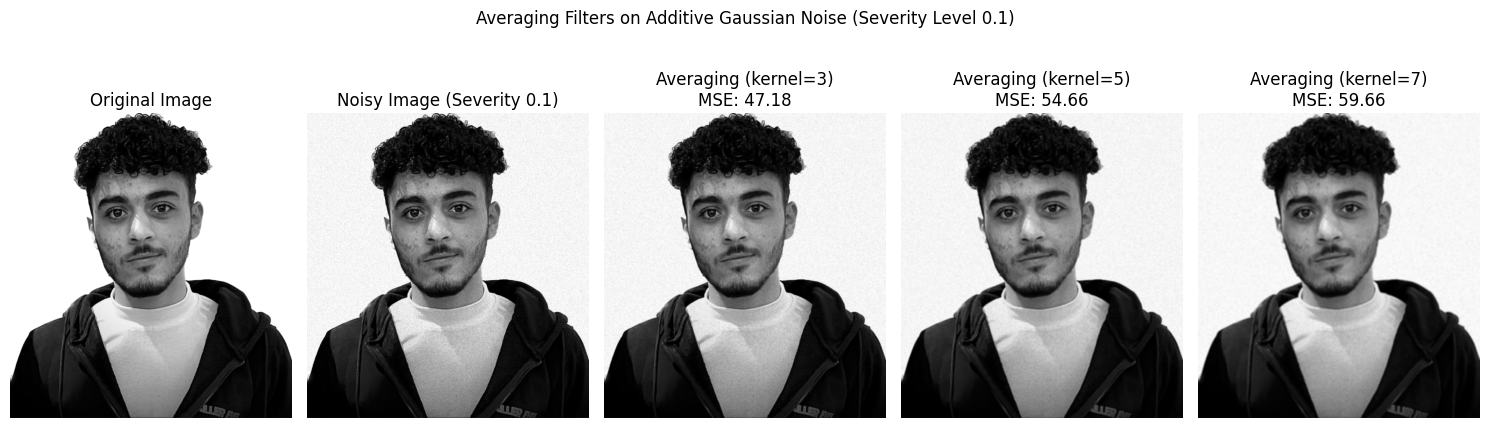

In [251]:
# Define different kernel sizes for the Averaging Filter
kernel_sizes = [3, 5, 7]

# Store results for visualization
results = []

# Apply filters to the noisy image with severity level 10
for kernel in kernel_sizes:
    # Apply Averaging Filter with the current kernel size
    filtered_image = apply_averaging_filter(noisy_image_0_1, kernel)

    # Calculate MSE between the original (noise-free) and the filtered image
    mse = calculate_mse(image_gray, filtered_image)

    # Store the result (title, image, mse) for display
    results.append((f"Averaging (kernel={kernel})", filtered_image, mse))

# Display original, noisy, and filtered images for the noisy image with severity level 10
fig, axes = plt.subplots(1, len(results) + 2, figsize=(15, 5))
fig.suptitle("Averaging Filters on Additive Gaussian Noise (Severity Level 0.1)")

# Show original image
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show noisy image
axes[1].imshow(noisy_image_0_1, cmap='gray')
axes[1].set_title("Noisy Image (Severity 0.1)")
axes[1].axis('off')

# Show each filtered image and MSE
for ax, (title, img, mse) in zip(axes[2:], results):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{title}\nMSE: {mse:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()


* 0.5 severity

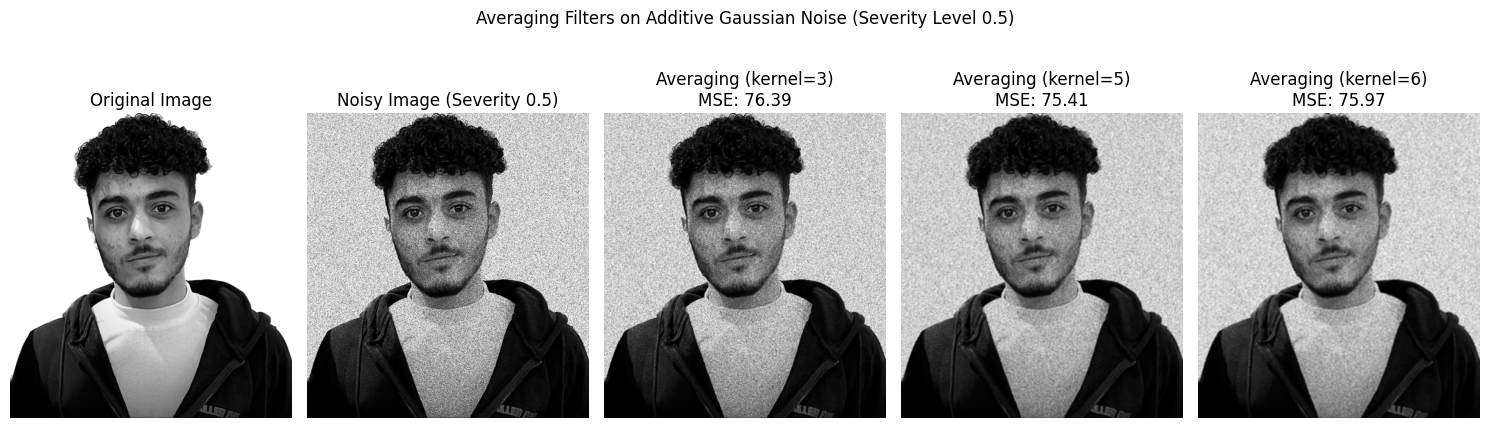

In [252]:
# Define different kernel sizes for the Averaging Filter
kernel_sizes = [3, 5, 6]

# Store results for visualization
results = []

# Apply filters to the noisy image with severity level 10
for kernel in kernel_sizes:
    # Apply Averaging Filter with the current kernel size
    filtered_image = apply_averaging_filter(noisy_image_0_5, kernel)

    # Calculate MSE between the original (noise-free) and the filtered image
    mse = calculate_mse(image_gray, filtered_image)

    # Store the result (title, image, mse) for display
    results.append((f"Averaging (kernel={kernel})", filtered_image, mse))

# Display original, noisy, and filtered images for the noisy image with severity level 10
fig, axes = plt.subplots(1, len(results) + 2, figsize=(15, 5))
fig.suptitle("Averaging Filters on Additive Gaussian Noise (Severity Level 0.5)")

# Show original image
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show noisy image
axes[1].imshow(noisy_image_0_5, cmap='gray')
axes[1].set_title("Noisy Image (Severity 0.5)")
axes[1].axis('off')

# Show each filtered image and MSE
for ax, (title, img, mse) in zip(axes[2:], results):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{title}\nMSE: {mse:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()


* 0.9 severity

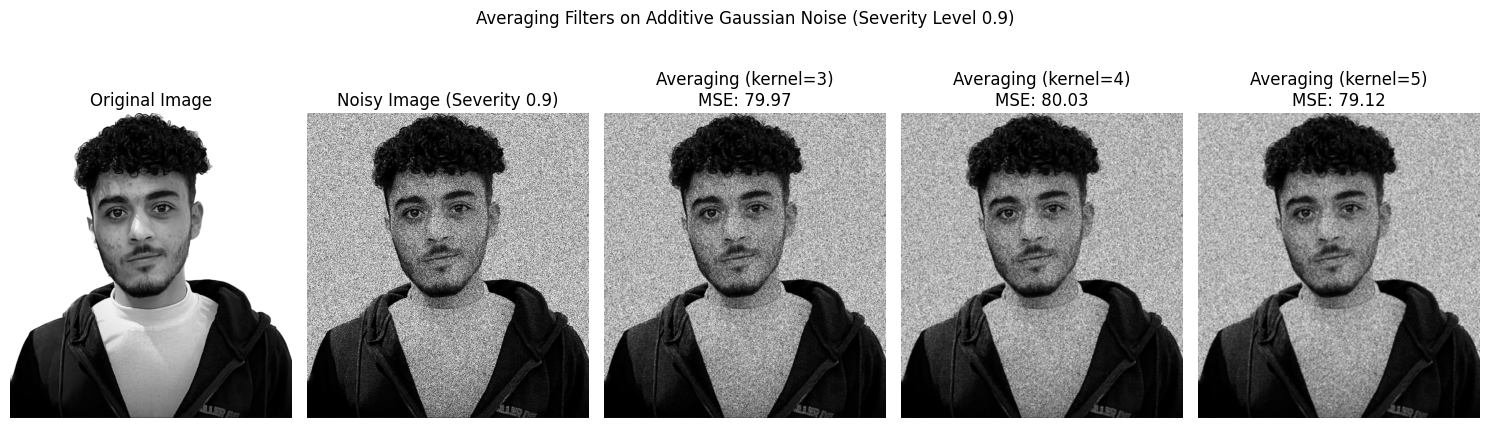

In [256]:
# Define different kernel sizes for the Averaging Filter
kernel_sizes = [3, 4, 5]

# Store results for visualization
results = []

# Apply filters to the noisy image with severity level 0.9
for kernel in kernel_sizes:
    # Apply Averaging Filter with the current kernel size
    filtered_image = apply_averaging_filter(noisy_image_0_9, kernel)

    # Calculate MSE between the original (noise-free) and the filtered image
    mse = calculate_mse(image_gray, filtered_image)

    # Store the result (title, image, mse) for display
    results.append((f"Averaging (kernel={kernel})", filtered_image, mse))

# Display original, noisy, and filtered images for the noisy image with severity level 0.9
fig, axes = plt.subplots(1, len(results) + 2, figsize=(15, 5))
fig.suptitle("Averaging Filters on Additive Gaussian Noise (Severity Level 0.9)")

# Show original image
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show noisy image
axes[1].imshow(noisy_image_0_9, cmap='gray')
axes[1].set_title("Noisy Image (Severity 0.9)")
axes[1].axis('off')

# Show each filtered image and MSE
for ax, (title, img, mse) in zip(axes[2:], results):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{title}\nMSE: {mse:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()


###**For Impulse noise of five different severity levels**

*   0.2 severity
*   0.3 severity
*   0.4 severity

* 0.2 severity

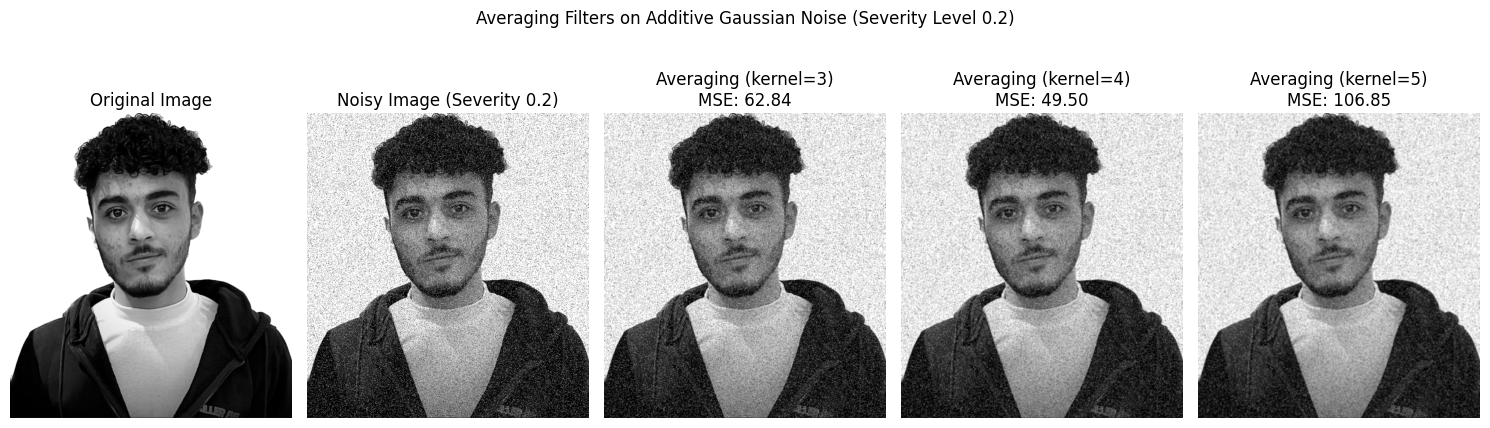

In [268]:
# Define different kernel sizes for the Averaging Filter
kernel_sizes = [3, 4, 5]

# Store results for visualization
results = []

# Apply filters to the noisy image with severity level 0.2
for kernel in kernel_sizes:
    # Apply Averaging Filter with the current kernel size
    filtered_image = apply_averaging_filter(noisy_image_0_2, kernel)

    # Calculate MSE between the original (noise-free) and the filtered image
    mse = calculate_mse(image_gray, filtered_image)

    # Store the result (title, image, mse) for display
    results.append((f"Averaging (kernel={kernel})", filtered_image, mse))

# Display original, noisy, and filtered images for the noisy image with severity level 0.2
fig, axes = plt.subplots(1, len(results) + 2, figsize=(15, 5))
fig.suptitle("Averaging Filters on Additive Gaussian Noise (Severity Level 0.2)")

# Show original image
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show noisy image
axes[1].imshow(noisy_image_0_2, cmap='gray')
axes[1].set_title("Noisy Image (Severity 0.2)")
axes[1].axis('off')

# Show each filtered image and MSE
for ax, (title, img, mse) in zip(axes[2:], results):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{title}\nMSE: {mse:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()


* 0.3 severity

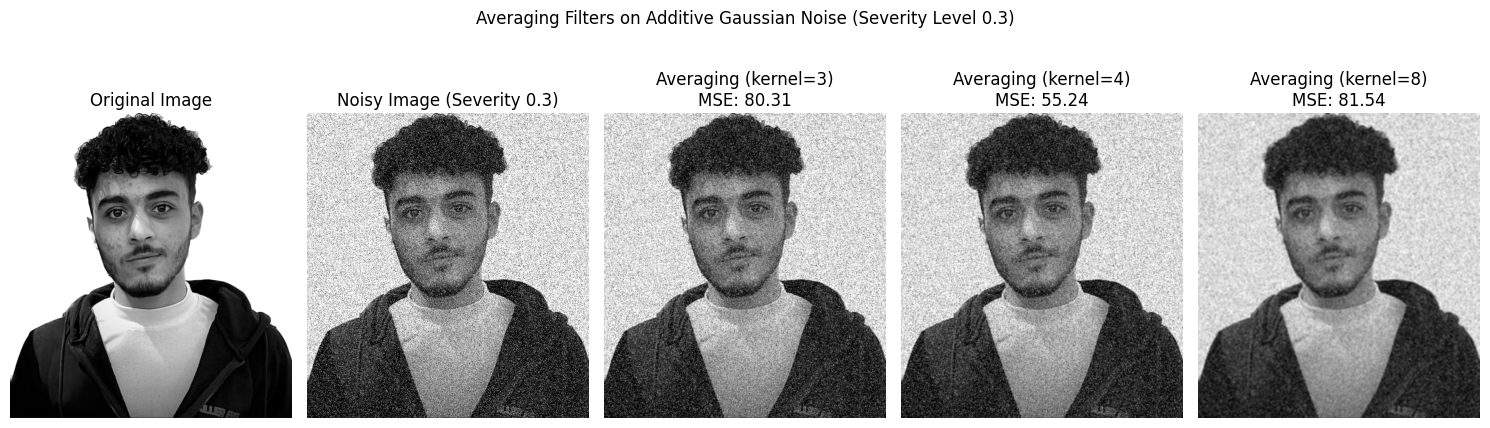

In [274]:
# Define different kernel sizes for the Averaging Filter
kernel_sizes = [3, 4, 8]

# Store results for visualization
results = []

# Apply filters to the noisy image with severity level 0.3
for kernel in kernel_sizes:
    # Apply Averaging Filter with the current kernel size
    filtered_image = apply_averaging_filter(noisy_image_0_3, kernel)

    # Calculate MSE between the original (noise-free) and the filtered image
    mse = calculate_mse(image_gray, filtered_image)

    # Store the result (title, image, mse) for display
    results.append((f"Averaging (kernel={kernel})", filtered_image, mse))

# Display original, noisy, and filtered images for the noisy image with severity level 0.3
fig, axes = plt.subplots(1, len(results) + 2, figsize=(15, 5))
fig.suptitle("Averaging Filters on Additive Gaussian Noise (Severity Level 0.3)")

# Show original image
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show noisy image
axes[1].imshow(noisy_image_0_3, cmap='gray')
axes[1].set_title("Noisy Image (Severity 0.3)")
axes[1].axis('off')

# Show each filtered image and MSE
for ax, (title, img, mse) in zip(axes[2:], results):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{title}\nMSE: {mse:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()


* 0.4 severity

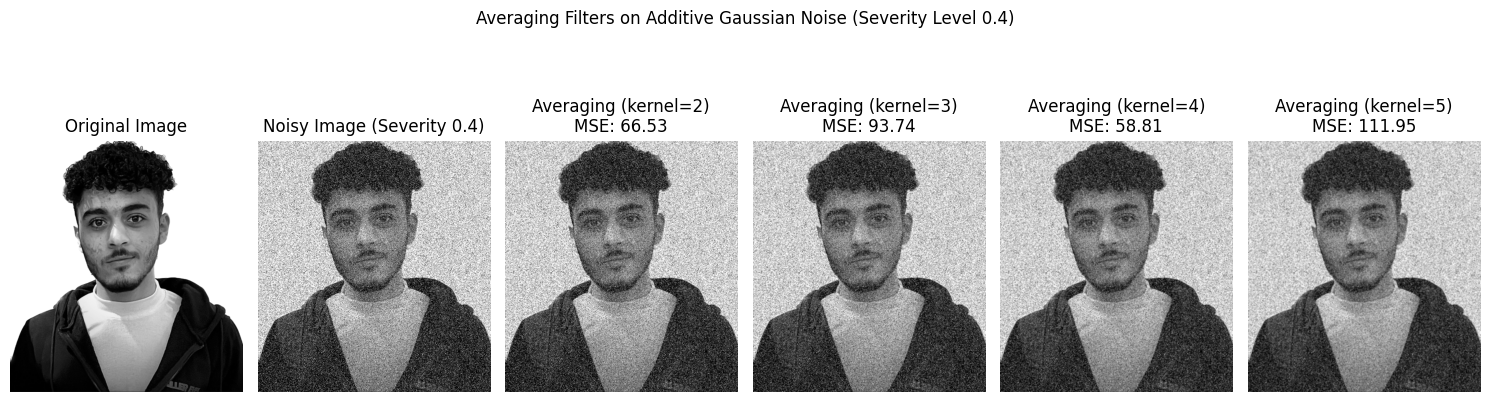

In [278]:
# Define different kernel sizes for the Averaging Filter
kernel_sizes = [2,3, 4, 5]

# Store results for visualization
results = []

# Apply filters to the noisy image with severity level 0.4
for kernel in kernel_sizes:
    # Apply Averaging Filter with the current kernel size
    filtered_image = apply_averaging_filter(noisy_image_0_4, kernel)

    # Calculate MSE between the original (noise-free) and the filtered image
    mse = calculate_mse(image_gray, filtered_image)

    # Store the result (title, image, mse) for display
    results.append((f"Averaging (kernel={kernel})", filtered_image, mse))

# Display original, noisy, and filtered images for the noisy image with severity level 0.4
fig, axes = plt.subplots(1, len(results) + 2, figsize=(15, 5))
fig.suptitle("Averaging Filters on Additive Gaussian Noise (Severity Level 0.4)")

# Show original image
axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show noisy image
axes[1].imshow(noisy_image_0_4, cmap='gray')
axes[1].set_title("Noisy Image (Severity 0.4)")
axes[1].axis('off')

# Show each filtered image and MSE
for ax, (title, img, mse) in zip(axes[2:], results):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{title}\nMSE: {mse:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()
